In [35]:
%reload_ext nb_black
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from sqlalchemy import create_engine
import warnings

from sklearn import linear_model
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.outliers_influence import variance_inflation_factor


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

warnings.filterwarnings("ignore")
sns.set(style="whitegrid")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [5]:
postgres_user = "dsbc_student"
postgres_pw = "7*.8G9QH21"
postgres_host = "142.93.121.174"
postgres_port = "5432"
postgres_db = "weatherinszeged"

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Predicting Temperature

In [6]:
engine = create_engine(
    "postgresql://{}:{}@{}:{}/{}".format(
        postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db
    )
)
weatherinszeged = pd.read_sql_query("select * from weatherinszeged", con=engine)

# no need for an open connection, as we're only doing a single query
engine.dispose()


weatherinszeged.head(10)

,date,summary,preciptype,temperature,apparenttemperature,humidity,windspeed,windbearing,visibility,loudcover,pressure,dailysummary
0,2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 01:00:00+00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
5,2006-04-01 03:00:00+00:00,Partly Cloudy,rain,9.222222,7.111111,0.85,13.9587,258.0,14.9569,0.0,1016.66,Partly cloudy throughout the day.
6,2006-04-01 04:00:00+00:00,Partly Cloudy,rain,7.733333,5.522222,0.95,12.3648,259.0,9.9820,0.0,1016.72,Partly cloudy throughout the day.
7,2006-04-01 05:00:00+00:00,Partly Cloudy,rain,8.772222,6.527778,0.89,14.1519,260.0,9.9820,0.0,1016.84,Partly cloudy throughout the day.
8,2006-04-01 06:00:00+00:00,Partly Cloudy,rain,10.822222,10.822222,0.82,11.3183,259.0,9.9820,0.0,1017.37,Partly cloudy throughout the day.
9,2006-04-01 07:00:00+00:00,Partly Cloudy,rain,13.772222,13.772222,0.72,12.5258,279.0,9.9820,0.0,1017.22,Partly cloudy throughout the day.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [9]:
weatherinszeged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   date                 96453 non-null  datetime64[ns, UTC]
 1   summary              96453 non-null  object             
 2   preciptype           96453 non-null  object             
 3   temperature          96453 non-null  float64            
 4   apparenttemperature  96453 non-null  float64            
 5   humidity             96453 non-null  float64            
 6   windspeed            96453 non-null  float64            
 7   windbearing          96453 non-null  float64            
 8   visibility           96453 non-null  float64            
 9   loudcover            96453 non-null  float64            
 10  pressure             96453 non-null  float64            
 11  dailysummary         96453 non-null  object             
dtypes: datetime64[ns, 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [17]:
weatherinszeged_model_cols = weatherinszeged[
    ["humidity", "windspeed", "windbearing", "pressure", "temperature"]
]
X = weatherinszeged[["humidity", "windspeed", "windbearing", "pressure"]]
y = weatherinszeged["temperature"]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

X_train_const = sm.add_constant(X_train)
X_test_const = sm.add_constant(X_test)

linear_model = sm.OLS(y_train, X_train_const)

lm_results = linear_model.fit()
lm_results.summary()

y_pred = lm_results.predict(X_train_const)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

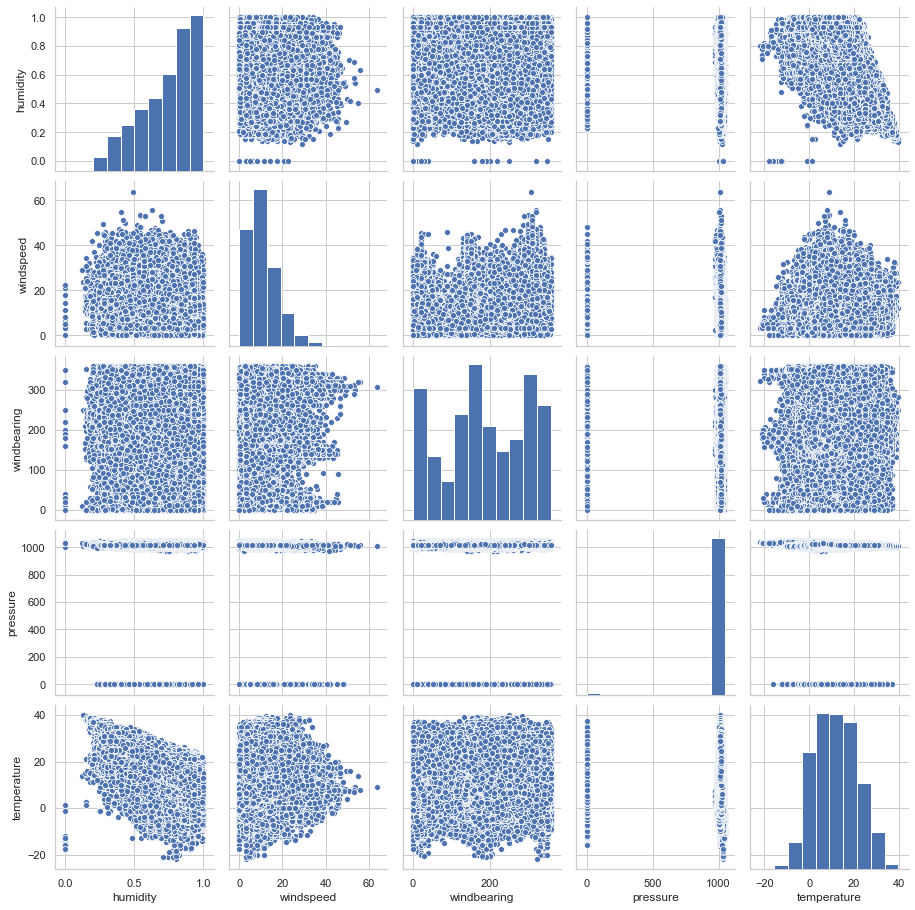

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [18]:
sns.pairplot(weatherinszeged_model_cols)

# Linearity

In [19]:
# from the pairplot, these variables are not linear, and do not appear
# to benefit from transformation
# humidity has the strongest trend, but it still appears

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Error has a mean of 0

In [20]:
# OLS ensures this

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Homoscedasticity

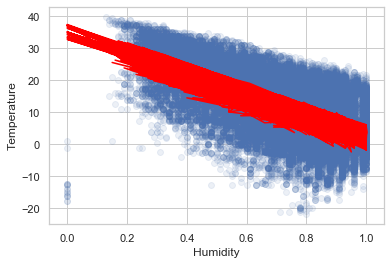

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [24]:
# humidity
plt.scatter(X_train["humidity"], y_train, alpha=0.1)
plt.plot(X_train["humidity"], y_pred, c="red")
plt.xlabel("Humidity")
plt.ylabel("Temperature")
plt.show()

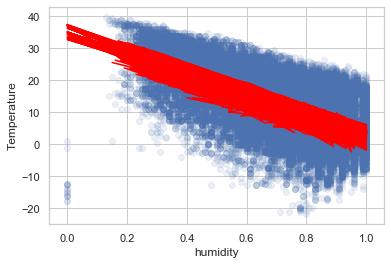

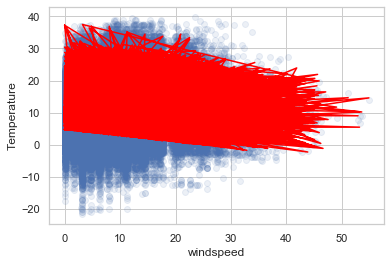

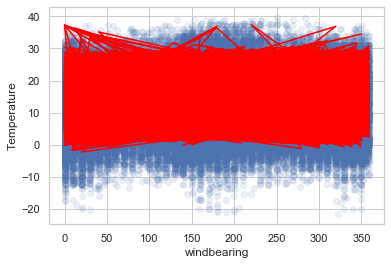

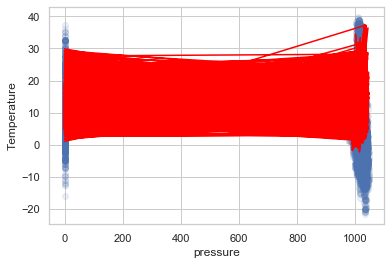

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [27]:
for col in X_train.columns:
    plt.scatter(X_train[col], y_train, alpha=0.1)
    plt.plot(X_train[col], y_pred, c="red")
    plt.xlabel(str(col))
    plt.ylabel("Temperature")
    plt.show()

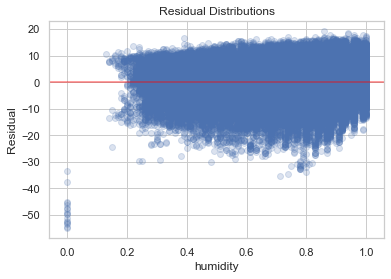

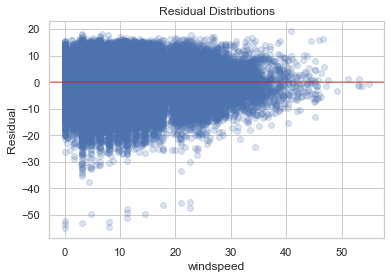

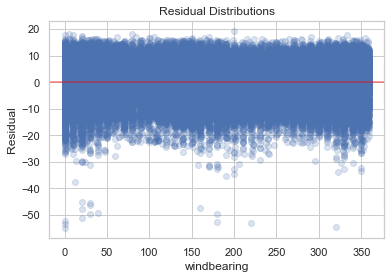

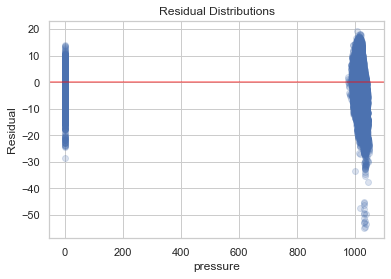

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [32]:
residuals = lm_results.resid

for col in X_train.columns:
    plt.scatter(X_train[col], residuals, alpha=0.2)
    plt.axhline(0, c="red", alpha=0.5)
    plt.xlabel(str(col))
    plt.ylabel("Residual")
    plt.title("Residual Distributions")
    plt.show()

In [34]:
_, p, _, _ = het_breuschpagan(residuals, X_train_const)
p
# definitely violates homoscedasicity

1.4662127078729035e-77

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Multicolinearity

In [36]:
import warnings
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


def print_vif(x):
    """Utility for checking multicollinearity assumption
    
    :param x: input features to check using VIF. This is assumed to be a pandas.DataFrame
    :return: nothing is returned the VIFs are printed as a pandas series
    """
    # Silence numpy FutureWarning about .ptp
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        x = sm.add_constant(x)

    vifs = []
    for i in range(x.shape[1]):
        vif = variance_inflation_factor(x.values, i)
        vifs.append(vif)

    print("VIF results\n-------------------------------")
    print(pd.Series(vifs, index=x.columns))
    print("-------------------------------\n")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [38]:
print_vif(X_test_const)
# looks like there's no multicolinearity

VIF results
-------------------------------
const          105.550753
humidity         1.058921
windspeed        1.073536
windbearing      1.012390
pressure         1.002070
dtype: float64
-------------------------------



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Predicting House Prices

In [39]:
postgres_db = "houseprices"
engine = create_engine(
    "postgresql://{}:{}@{}:{}/{}".format(
        postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db
    )
)
houseprices_df = pd.read_sql_query("select * from houseprices", con=engine)

# no need for an open connection, as we're only doing a single query
engine.dispose()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [44]:
houses = houseprices_df.dropna(axis=1)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [55]:
cols_of_interest = [
    "saleprice",
    "mszoning",
    "bldgtype",
    "housestyle",
    "overallcond",
    # "total_baths",  # some places have 0 bathrooms?
    "salecondition",
    "lotarea",
    # "lotfrontage",
    "yearremodadd",
    "yearbuilt",
    "garagearea",
]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [56]:
houses = houseprices_df[cols_of_interest]
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   saleprice      1460 non-null   int64 
 1   mszoning       1460 non-null   object
 2   bldgtype       1460 non-null   object
 3   housestyle     1460 non-null   object
 4   overallcond    1460 non-null   int64 
 5   salecondition  1460 non-null   object
 6   lotarea        1460 non-null   int64 
 7   yearremodadd   1460 non-null   int64 
 8   yearbuilt      1460 non-null   int64 
 9   garagearea     1460 non-null   int64 
dtypes: int64(6), object(4)
memory usage: 114.2+ KB


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

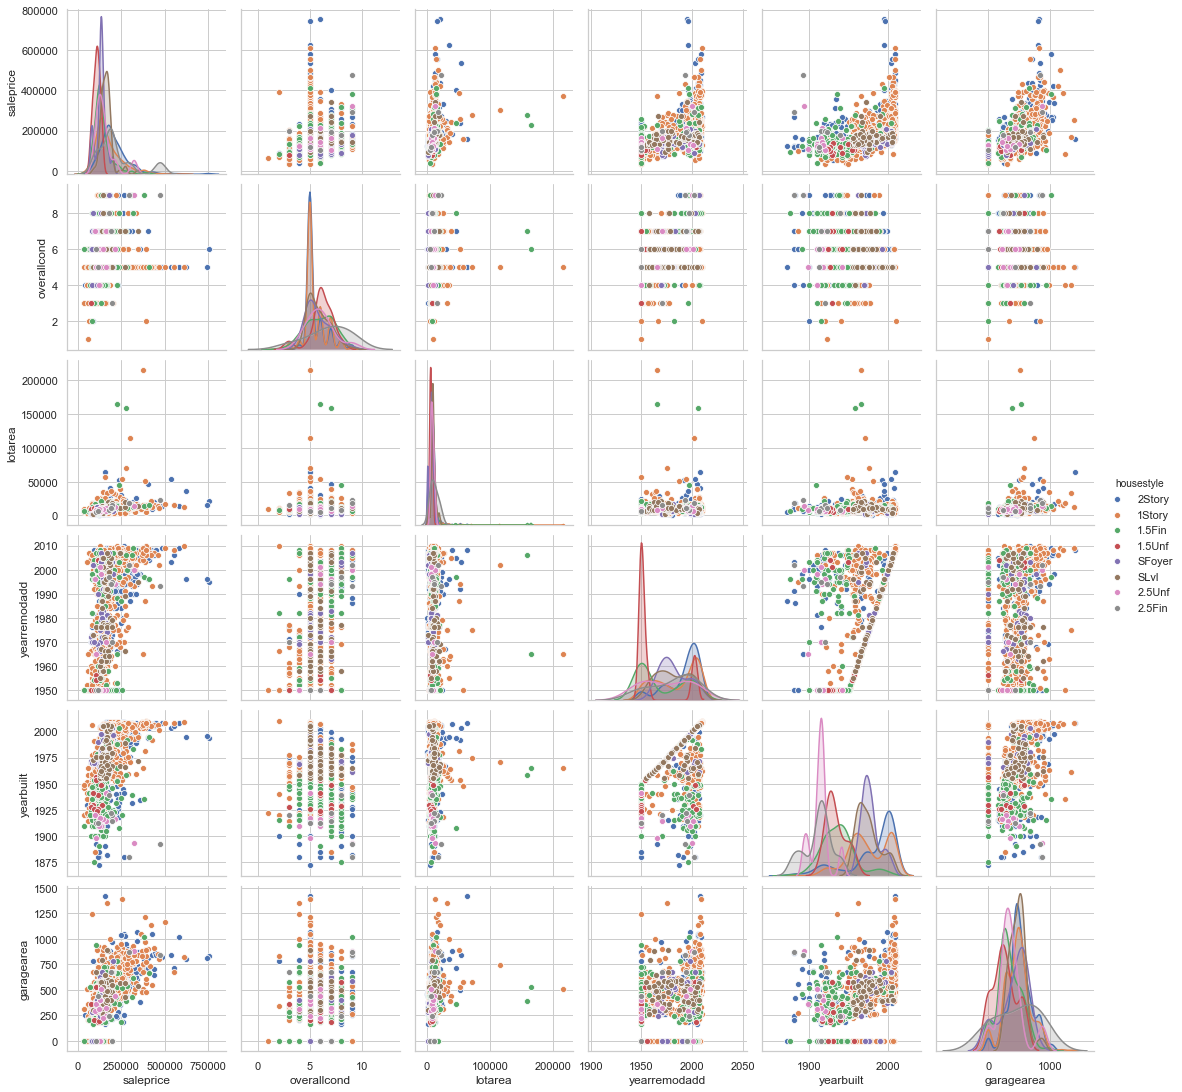

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [61]:
sns.pairplot(houses, hue="housestyle")

In [58]:
cat_cols = houses.select_dtypes(include="object").columns.values.tolist()

houses_dummied = pd.get_dummies(houses, drop_first=True)

X = houses_dummied.drop(columns=["saleprice"])
y = houses_dummied["saleprice"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [59]:
X_train_const = sm.add_constant(X_train)
X_test_const = sm.add_constant(X_test)

linear_model = sm.OLS(y_train, X_train_const)

lm_results = linear_model.fit()
lm_results.summary()

y_pred = lm_results.predict(X_train_const)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Linearity

# Error has a mean of 0

# Homoscedasticity

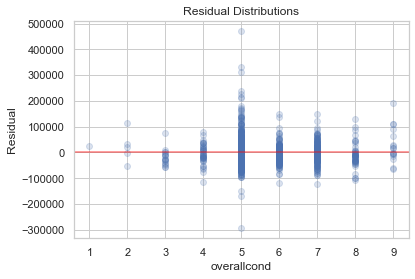

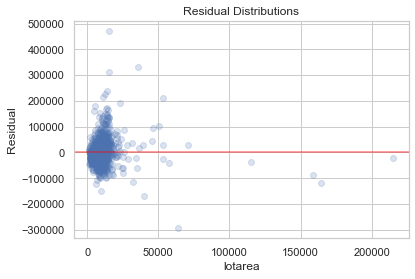

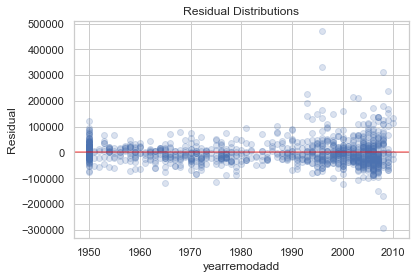

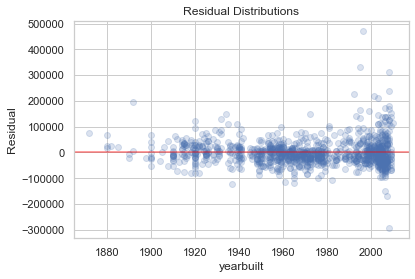

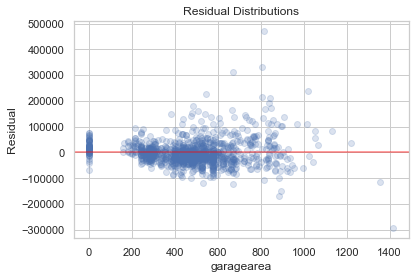

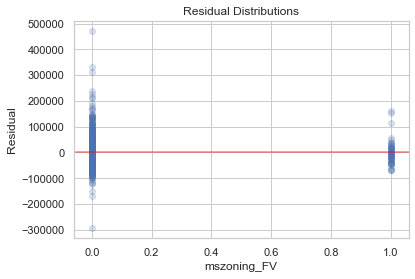

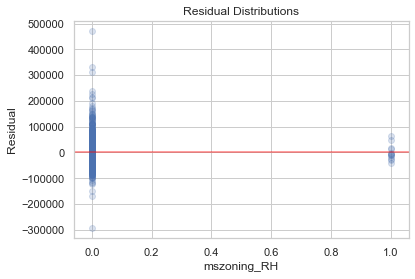

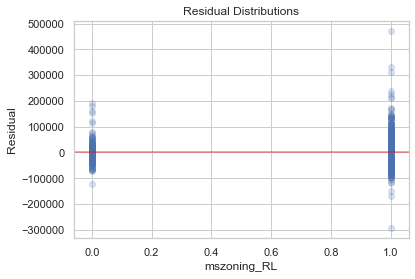

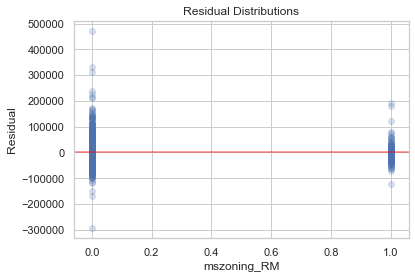

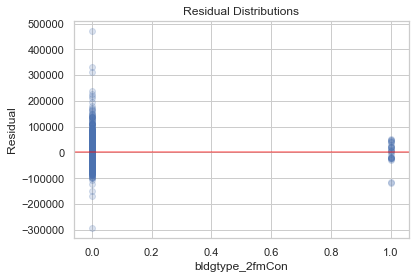

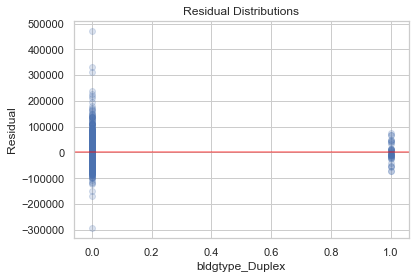

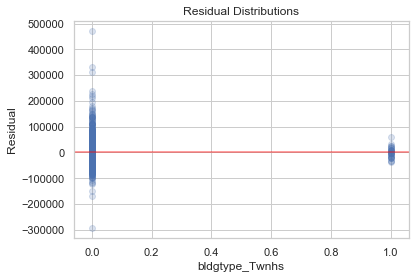

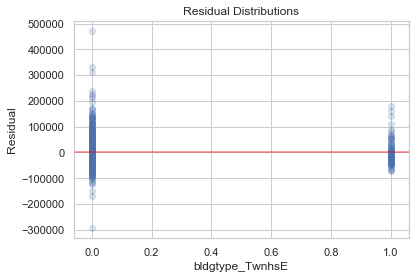

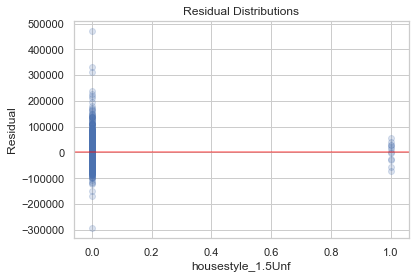

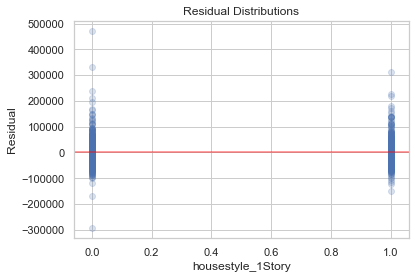

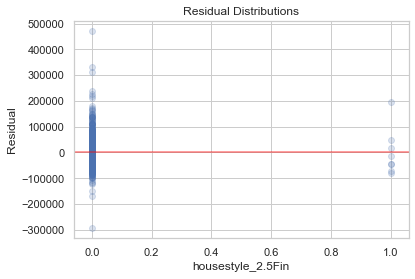

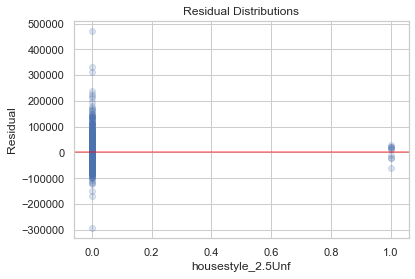

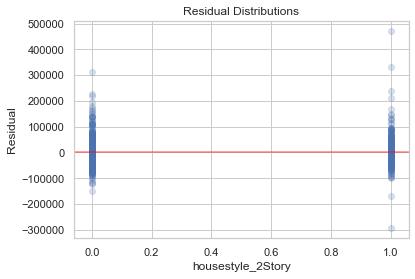

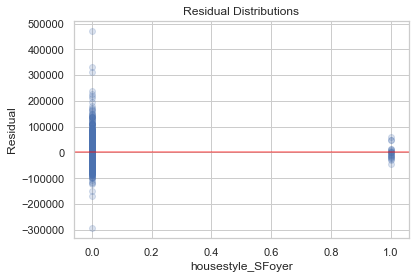

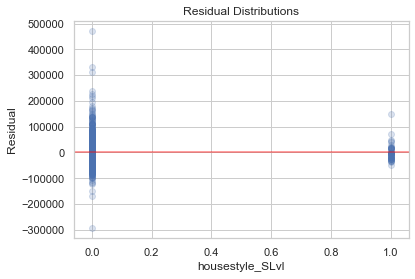

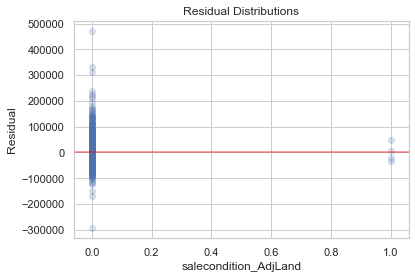

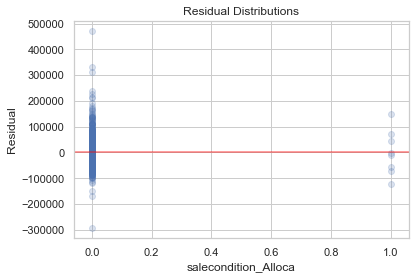

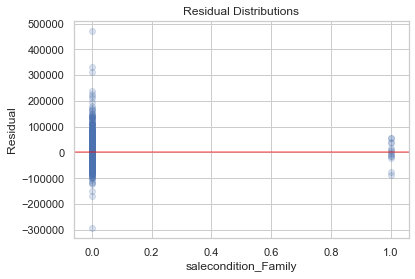

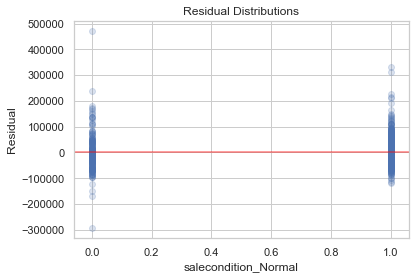

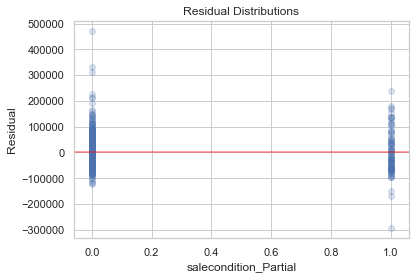

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [62]:
residuals = lm_results.resid

for col in X_train.columns:
    plt.scatter(X_train[col], residuals, alpha=0.2)
    plt.axhline(0, c="red", alpha=0.5)
    plt.xlabel(str(col))
    plt.ylabel("Residual")
    plt.title("Residual Distributions")
    plt.show()

# Multicolinearity

In [63]:
print_vif(X_train)

VIF results
-------------------------------
const                    15814.435391
overallcond                  1.478955
lotarea                      1.110061
yearremodadd                 2.006714
yearbuilt                    3.407655
garagearea                   1.455190
mszoning_FV                 14.207822
mszoning_RH                  4.394262
mszoning_RL                 49.156560
mszoning_RM                 37.225008
bldgtype_2fmCon              1.080355
bldgtype_Duplex              1.233326
bldgtype_Twnhs               1.195116
bldgtype_TwnhsE              1.262740
housestyle_1.5Unf            1.112827
housestyle_1Story            3.619463
housestyle_2.5Fin            1.102397
housestyle_2.5Unf            1.123659
housestyle_2Story            3.468459
housestyle_SFoyer            1.304930
housestyle_SLvl              1.528092
salecondition_AdjLand        1.113845
salecondition_Alloca         1.211466
salecondition_Family         1.210657
salecondition_Normal         2.451314
saleco

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>